# [EXP01] Pixel-based Operation (Linear and Gamma Operations)

## Dependencies

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
%matplotlib notebook

## Test array / Test image

<IPython.core.display.Javascript object>


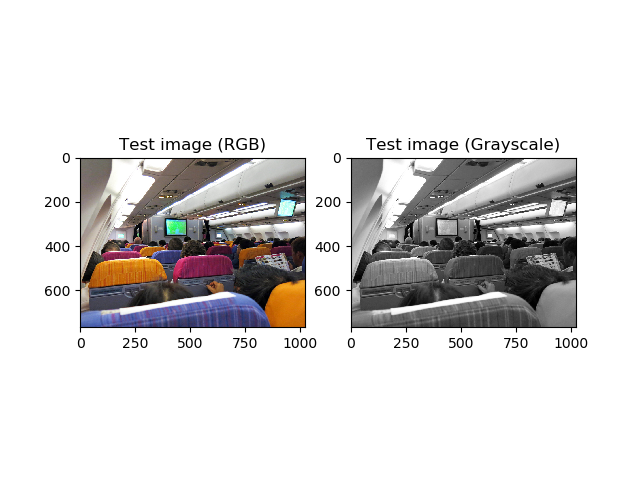

The test image consists of 768 rows and 1024 columns in 3 channels
Image size (W x H) = 1024 x 768


In [8]:
"""
#-- Uncomment for test array
#img = np.array([[[120,120,120],[130,130,130],[140,140,140],[150,150,150]],
#               [[120,120,120],[130,130,130],[140,140,140],[150,150,150]],
#               [[120,120,120],[130,130,130],[140,140,140],[150,150,150]],
#               [[120,120,120],[130,130,130],[140,140,140],[150,150,150]]],dtype='uint8')
"""

#"""
#-- Uncomment for test image
img_select = 'img4.jpg'
img = cv2.imread(img_select)
#"""

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(1)
plt.subplot(1,2,1)
plt.title('Test image (RGB)')
plt.imshow(img_rgb)
plt.subplot(1,2,2)
plt.title('Test image (Grayscale)')
plt.imshow(img_gray,'gray',vmin=0,vmax=255)

img_rows = img.shape[0]
img_cols = img.shape[1]
img_chs = img.shape[2]

print('The test image consists of {} rows and {} columns in {} channels'.format(img_rows,img_cols,img_chs))
print('Image size (W x H) = {} x {}'.format(img_cols,img_rows))

# [1] "Linear" operation on the Grayscale image

<IPython.core.display.Javascript object>


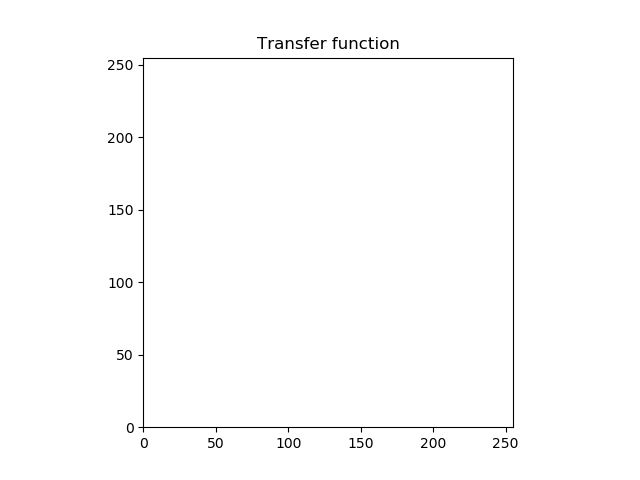

Input image values :
[[118 116 115 ... 188 188 188]
 [117 116 116 ... 187 188 188]
 [116 116 116 ... 187 188 188]
 ...
 [ 99  98  97 ...  98  92  95]
 [ 97  96  95 ...  99  94  99]
 [ 95  94  94 ...  98  94  99]]

Output image values :
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [9]:
# Transfer function parameters
a = 1     #--- a : contrast (slope)
b = 1    #--- b : translation (shifting)

# Transfer function plotting
input_axis = range(0,255)
output_axis = []

for i in input_axis:
    output_axis.append(((a*(i/255)) + b)*255)        # NOTE THIS 255 NORMALIZATION!!!
    
plt.figure(2),plt.title('Transfer function')
plt.plot(input_axis,output_axis),plt.gca().set_aspect('equal'),plt.xlim((0,255)),plt.ylim((0,255))

# Apply the "Linear" Pixel-based operation on the image
input_img = img_gray
output_img = np.zeros((input_img.shape[0],input_img.shape[1]),dtype='uint8')

for x in range(0,input_img.shape[0]):
    for y in range(0,input_img.shape[1]):
        output_value = (((a*(input_img[x][y]/255)) + b)*255)
        if output_value > 255: output_value = 255
        if output_value < 0: output_value = 0
        output_img[x][y] = output_value
        
print('Input image values :')
print(img_gray)
print('')
print('Output image values :')
print(output_img)

## Display the results

<IPython.core.display.Javascript object>


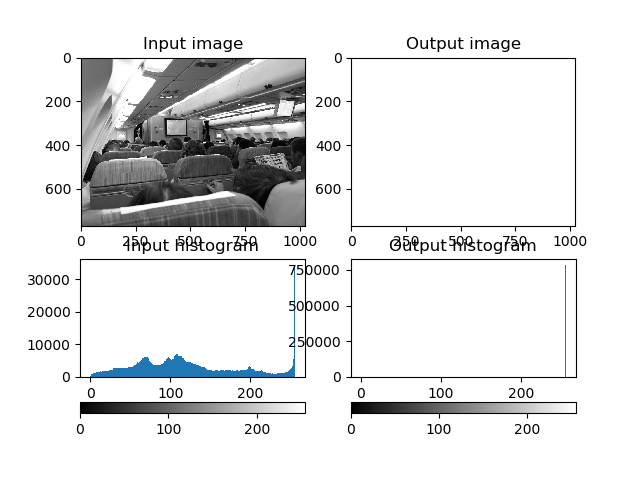

In [10]:
plt.figure(3)

plt.subplot(2,2,1),plt.title('Input image')
plt.imshow(input_img,'gray',vmin=0,vmax=255)

plt.subplot(2,2,2),plt.title('Output image')
plt.imshow(output_img,'gray',vmin=0,vmax=255)

plt.subplot(2,2,3),plt.title('Input histogram')
plt.hist(input_img.ravel(),256,[0,256]),plt.colorbar(orientation='horizontal');

plt.subplot(2,2,4),plt.title('Output histogram')
plt.hist(output_img.ravel(),256,[0,256]),plt.colorbar(orientation='horizontal');

# [2] "Gamma" operation on the Grayscale image

<IPython.core.display.Javascript object>


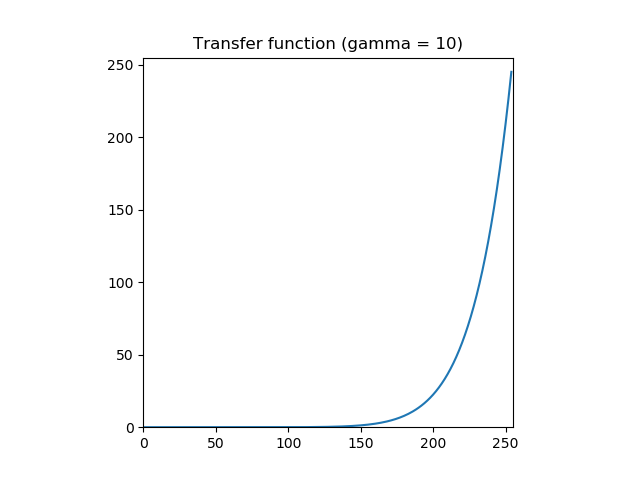

Input image values :
[[118 116 115 ... 188 188 188]
 [117 116 116 ... 187 188 188]
 [116 116 116 ... 187 188 188]
 ...
 [ 99  98  97 ...  98  92  95]
 [ 97  96  95 ...  99  94  99]
 [ 95  94  94 ...  98  94  99]]

Output image values :
[[ 0  0  0 ... 12 12 12]
 [ 0  0  0 ... 11 12 12]
 [ 0  0  0 ... 11 12 12]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [11]:
# Transfer function parameters
a = 1      #--- a : contrast (slope)
b = 0      #--- b : translation (shifting)
gamma = 10  #--- gamma : it's gamma, ok?

# Transfer function plotting
input_axis = range(0,255)
output_axis = []

for i in input_axis:
    output_axis.append(a*(np.power((i/255),gamma) + b)*255)     # NOTE THIS 255 NORMALIZATION!!!
    
plt.figure(4),plt.title('Transfer function (gamma = {})'.format(gamma))
plt.plot(input_axis,output_axis),plt.gca().set_aspect('equal'),plt.xlim((0,255)),plt.ylim((0,255))

# Apply the "Gamma" Pixel-based operation on the image
input_img = img_gray
output_img = np.zeros((input_img.shape[0],input_img.shape[1]),dtype='uint8')

for x in range(0,input_img.shape[0]):
    for y in range(0,input_img.shape[1]):
        output_value = a*(np.power((input_img[x][y]/255),gamma) + b)*255
        if output_value > 255: output_value = 255
        if output_value < 0: output_value = 0
        output_img[x][y] = output_value
        
print('Input image values :')
print(img_gray)
print('')
print('Output image values :')
print(output_img)

## Display the results

<IPython.core.display.Javascript object>


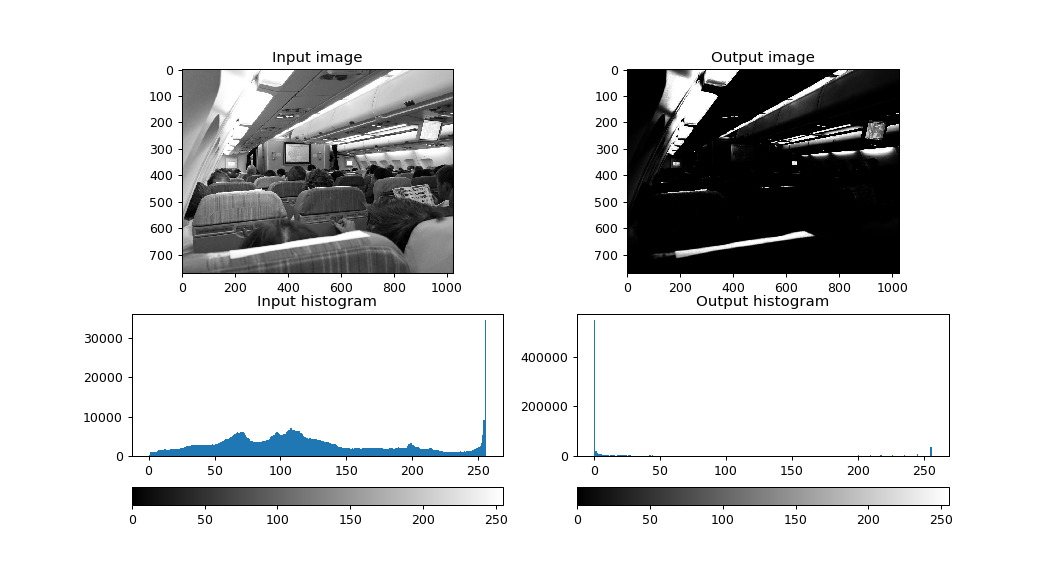

In [20]:
plt.figure(5)

plt.subplot(2,2,1),plt.title('Input image')
plt.imshow(input_img,'gray',vmin=0,vmax=255)

plt.subplot(2,2,2),plt.title('Output image')
plt.imshow(output_img,'gray',vmin=0,vmax=255)

plt.subplot(2,2,3),plt.title('Input histogram')
plt.hist(input_img.ravel(),256,[0,256]),plt.colorbar(orientation='horizontal');

plt.subplot(2,2,4),plt.title('Output histogram')
plt.hist(output_img.ravel(),256,[0,256]),plt.colorbar(orientation='horizontal');